In [25]:
import pickle
import numpy as np
from TVDCondat2013 import TVD
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [5]:
data_file = open('e24', 'rb')
data = pickle.load(data_file)
print(data.shape)

(86000,)


In [14]:
def getEmbeddedData(data, dim=2):
    '''
    data: np.array
        Time series values
    dim: int
        Dimension for delay embedding
    '''
    numpts = len(data) - (dim-1)
    pts = [[data[i+j] for j in range(dim)] for i in range(numpts)]
    return np.array(pts)

In [15]:
X = getEmbeddedData(data)

In [16]:
print(X)

[[-0.3762 -0.3703]
 [-0.3703 -0.3671]
 [-0.3671 -0.3671]
 ...
 [-0.6362 -0.6361]
 [-0.6361 -0.6385]
 [-0.6385 -0.6351]]


In [37]:
lbd = 2.5  # denoising parameter, see https://github.com/bgailleton/TVD_Condat2013
denoised = TVD(data, lbd)
sig = 60
gdenoised = gaussian_filter(data, sig)

In [20]:
Y = getEmbeddedData(denoised)
print(Y)

[[-0.40967401 -0.40967401]
 [-0.40967401 -0.40967401]
 [-0.40967401 -0.40967401]
 ...
 [-0.66323304 -0.66323304]
 [-0.66323304 -0.66323304]
 [-0.66323304 -0.66323304]]


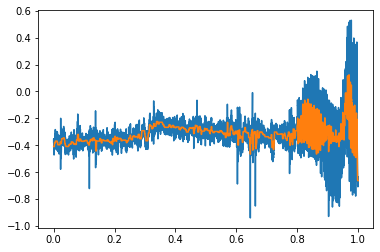

In [24]:
N = len(data)
t = np.linspace(0, 1, N + 1)[0:N]
plt.plot(t, data)
plt.plot(t, denoised)
plt.show()

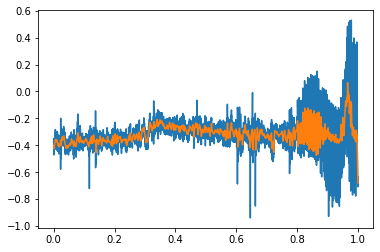

In [38]:
N = len(data)
t = np.linspace(0, 1, N + 1)[0:N]
plt.plot(t, data)
plt.plot(t, gdenoised)
plt.show()